Trained weights:  [ 20721.83744823 -17315.34765277  46447.67442734  27727.90535447]


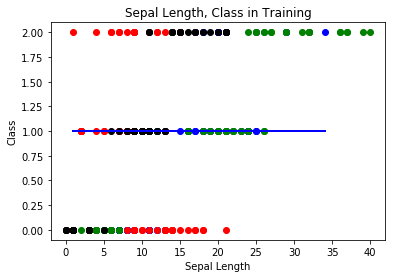

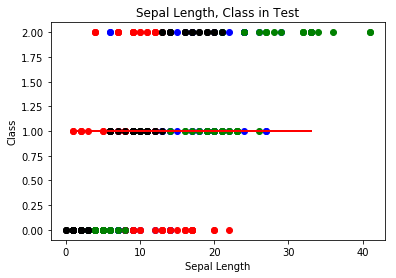

Accuracy using sklearn:  88.0 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

iris_raw = pd.read_csv("Iris.csv")

for column in iris_raw:
    iris_raw[column] = iris_raw[column].astype('category')
    iris_raw[column] = iris_raw[column].cat.codes
    
p = .1 #Training Rate
predX = []
trng_data = iris_raw.sample(frac=0.5, replace=True)
test_data = iris_raw.sample(frac=0.5, replace=True)

Y_train = trng_data[['Class']].values
X_train = trng_data[['SepalLn', 'SepalWd','PetalLn', 'PetalWd']].values

Y_test = test_data[['Class']].values
X_test = test_data[['SepalLn', 'SepalWd','PetalLn', 'PetalWd']].values

def chkWeights(x_i, y_i, w):
   ypred = predict(x_i, w)   # The predicted target
   error = y_i - ypred       
   return w + p * (y_i - ypred) * x_i  # Update the weights

def predict(x_i, w):
   return 1/(1+np.exp(-1 * np.dot(w.T, x_i)))

def SGD(X,y):
    w = np.array([random.random() for x in range(X.shape[1])])
    w_temp = w
    epoch = 0
    while epoch <= 1000:
        for i, x_i in enumerate(X):
            w = chkWeights(x_i, y[i], w)
        pred = 1/(1+np.exp(-1 * np.dot(X, w)))
        error = np.sum(pred - y[i])
        #print(error)
        epoch += 1
        if np.sum(np.abs(w_temp - w)) < 0.01:
            print('Epoch : ', epoch)
            print('Error : ', error)
            return w
        else: 
            w_temp = w
    return w

w = SGD(X_train,Y_train)
print('Trained weights: ', w)
predT = []
for i, x in enumerate(X_test):
    predT.append(1/(1+np.exp(-1 * np.dot(x, w))))
    error = np.sum(predT - Y_test[i])
    #print(x, predT)
train_pred = []
for x in X_train:
    train_pred.append(1/(1+np.exp(-1 * np.dot(x, w))))
    
plt.plot(trng_data['SepalLn'], Y_train, 'bo')
plt.plot(trng_data['SepalWd'], Y_train, 'ro')
plt.plot(trng_data['PetalLn'], Y_train, 'go')
plt.plot(trng_data['PetalWd'], Y_train, 'ko')
plt.plot(trng_data['SepalLn'], train_pred, linewidth=2, color='blue')
plt.title("Sepal Length, Class in Training")
plt.xlabel("Sepal Length")
plt.ylabel("Class")
plt.show() 

plt.plot(test_data['SepalLn'], Y_test, 'bo')
plt.plot(test_data['SepalWd'], Y_test, 'ro')
plt.plot(test_data['PetalLn'], Y_test, 'go')
plt.plot(test_data['PetalWd'], Y_test, 'ko')
plt.plot(test_data['SepalLn'], predT, linewidth=2, color='red')
plt.title("Sepal Length, Class in Test")
plt.xlabel("Sepal Length")
plt.ylabel("Class")
plt.show() 


#Using sklearn
logRegr = LogisticRegression()
logRegr.fit(X_train, Y_train)
predictions = logRegr.predict(X_test)
score = logRegr.score(X_test, Y_test)
print("Accuracy using sklearn: ", score*100,"%")